<a href="https://colab.research.google.com/github/minjeon99/ESAA-10th-OB/blob/Project1/OB1_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 0. 한글 폰트

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

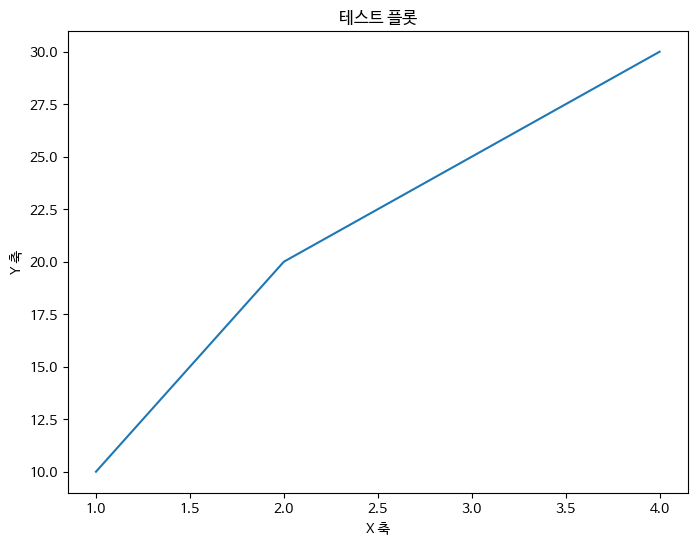

In [ ]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

# 플롯 예시
plt.figure(figsize=(8, 6))
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.title('테스트 플롯')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.show()

# 1. 데이터 로드

In [ ]:
fest_df = pd.read_csv('/content/drive/MyDrive/24-1/ESAA/프로젝트1/행정동 확인 후 변수❤️/❤️지역축제_최종합본.csv')
fest_df

,축제명,시도,시군구,행정동,행정동코드,축제유형,시작일,종료일,기간,개최연도수,방문객수,예산,정류장공급도,공영주차장,민영주차장,주차장개수,주차구획수,관광지개수,외지인수
0,송도대표 축제,인천광역시,연수구,송도2동,2.818583e+09,전통역사,2023-09-16,2023-09-17,1,1,20000,280,17.1,73,0,73,7022,4,16614.0
1,포천 시민의날 축제,경기도,포천시,포천동,4.165051e+09,주민화합,2023-09-23,2023-09-24,1,20,40000,260,78.9,49,0,49,2978,2,11946.0
2,부조장터문화축제,경상북도,포항시,생지리,4.711125e+09,전통역사,2023-09-16,2023-09-17,1,0,20000,125,6.9,333,105,438,20426,1,21675.0
3,평택 가을 수확축제,경기도,평택시,숙성리,4.122034e+09,문화예술,2023-10-14,2023-10-15,1,1,22574,50,22.8,152,0,152,8802,1,31203.0
4,포항운하축제,경상북도,포항시,송도동,4.711155e+09,주민화합,2023-09-09,2023-09-10,1,9,30000,120,6.9,333,105,438,20426,1,17562.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2023년 김광석 나의 노래 다시 부르기 대회,대구광역시,중구,대봉동,2.711068e+09,문화예술,2023-10-07,2023-10-07,0,10,2500,159,21.2,23,151,174,8764,0,12273.0
210,제51회 우륵문화제,충청북도,충주시,칠금동,4.313062e+09,문화예술,2023-09-06,2023-09-10,4,52,50000,300,0.1,7,0,7,972,4,90216.0
211,제36회 지용제,충청북도,옥천군,옥천읍,4.373025e+09,문화예술,2023-09-07,2023-09-10,3,35,63248,529,64.6,21,0,21,1261,1,68589.0
212,제46회 심훈상록문화제,충청남도,당진시,읍내동,4.427051e+09,기타,2023-09-23,2023-09-23,0,46,5000,150,1.4,10,0,10,1106,3,9729.0


In [ ]:
fest = fest_df.copy()

## 2. EDA

<Axes: >

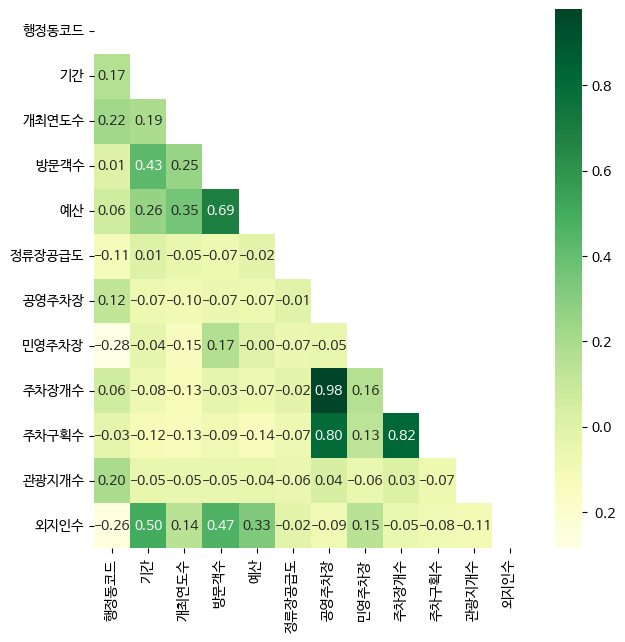

In [ ]:
corr_df = fest_df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(7,7))

mask = np.zeros_like(corr_df, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='YlGn', mask=mask)

# 3. 전처리

## 외지인수 함수 정의

In [ ]:
def stay_minmax(stay_df_list, dong_code):
  print('start')
  stay_sum = 0
  skt_per = 1/3
  for stay_df in stay_df_list:
    stay_time = stay_df[stay_df.hdong_cd==dong_code].groupby('time')['stay_cnts'].sum()
    print(stay_time.min(), stay_time.max(), stay_time.max()-stay_time.min())
    stay_minmax = stay_time.max()-stay_time.min()
    stay_sum += stay_minmax
  foriegn = stay_sum/skt_per
  return foriegn

In [ ]:
def load_stay(festival_df):
    festival_df['외지인수'] = 0
    for index, row in festival_df.iterrows():
        stay_list = []
        start_date = row['시작일']
        end_date = row['종료일']
        h_code = row['행정동코드']
        fest_range = pd.date_range(start_date, end_date)

        for date in fest_range:
            file_name = f"stay_{date.strftime('%Y%m%d')}_1.csv"
            file_path = f"/content/drive/MyDrive/프로젝트1/stay/{file_name}"

            if os.path.exists(file_path):
                stay_df = pd.read_csv(file_path)
                stay_list.append(stay_df)
                print(f"Loaded: {file_path}")
            else:
                print(f"File not found: {file_path}")

        for_num = stay_minmax(stay_list, h_code)
        festival_df.iloc[index, -1] = for_num

In [ ]:
## 함수 적용
#load_stay(fest_tmp1)

# 4. 회귀 모델

### LightGBM

* 데이터 전처리




In [ ]:
fest = fest_df[['시도','행정동코드','축제유형', '기간', '방문객수','개최연도수', '예산','정류장공급도', '주차장개수', '주차구획수', '관광지개수','외지인수']]
fest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도      214 non-null    object 
 1   행정동코드   214 non-null    float64
 2   축제유형    214 non-null    object 
 3   기간      214 non-null    int64  
 4   방문객수    214 non-null    int64  
 5   개최연도수   214 non-null    int64  
 6   예산      214 non-null    int64  
 7   정류장공급도  214 non-null    float64
 8   주차장개수   214 non-null    int64  
 9   주차구획수   214 non-null    int64  
 10  관광지개수   214 non-null    int64  
 11  외지인수    214 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 20.2+ KB


In [ ]:
#'시도','축제유형'

one_hot_encoded = pd.get_dummies(fest, columns=['시도','축제유형'])
print(one_hot_encoded)

            행정동코드  기간   방문객수  개최연도수   예산  정류장공급도  주차장개수  주차구획수  관광지개수  \
0    2.818583e+09   1  20000      1  280    17.1     73   7022      4   
1    4.165051e+09   1  40000     20  260    78.9     49   2978      2   
2    4.711125e+09   1  20000      0  125     6.9    438  20426      1   
3    4.122034e+09   1  22574      1   50    22.8    152   8802      1   
4    4.711155e+09   1  30000      9  120     6.9    438  20426      1   
..            ...  ..    ...    ...  ...     ...    ...    ...    ...   
209  2.711068e+09   0   2500     10  159    21.2    174   8764      0   
210  4.313062e+09   4  50000     52  300     0.1      7    972      4   
211  4.373025e+09   3  63248     35  529    64.6     21   1261      1   
212  4.427051e+09   0   5000     46  150     1.4     10   1106      3   
213  2.635056e+09   1   2000      6   90    34.7    158   6905      4   

        외지인수  ...  시도_전라북도  시도_제주특별자치도  시도_충청남도  시도_충청북도  축제유형_기타  축제유형_문화예술  \
0    16614.0  ...    False       False    F

In [ ]:
target = one_hot_encoded['방문객수']
ftr = one_hot_encoded.drop('방문객수',axis=1)

* train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ftr,target,test_size=0.2,random_state=100)

* Model

In [ ]:
from lightgbm import LGBMRegressor
from lightgbm import early_stopping

# LightGBM 회귀 모델 생성
lgbm_reg = LGBMRegressor(random_state=100)

# 모델 학습
evals = [(X_train, y_train), (X_test, y_test)]
lgbm_reg.fit(X_train, y_train,
              eval_metric="l2",
              eval_set=evals,
              callbacks=[early_stopping(10)])  # 10 라운드 동안 성능 개선이 없으면 중지

# 예측
predictions = lgbm_reg.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 171, number of used features: 14
[LightGBM] [Info] Start training from score 158291.087719
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 성능 평가
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # RMSE 계산
r2 = r2_score(y_test, predictions)

# 결과 출력
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 67417.01919904388
MSE: 7395178327.54963
RMSE: 85995.22270190147
R²: 0.020565458523170932


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


* GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 80, 100],
    'learning_rate': [0.05, 0.1, 0.3],
    'num_leaves': [10, 30,45],
    'max_depth': [-1, 10, 20]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=lgbm_reg,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           verbose=1)

# 모델 학습
grid_search.fit(X_train, y_train,
              eval_metric="l2",
              eval_set=evals,
              callbacks=[early_stopping(10)])

# 최적 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[26]	valid_0's l2: 5.22042e+10	valid_1's l2: 9.63145e+09
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# 최적 모델로 예측
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)


# 성능 평가
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # RMSE 계산
r2 = r2_score(y_test, predictions)

# 결과 출력
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 70618.31796422214
MSE: 7752389215.475319
RMSE: 88047.6530946471
R²: -0.026744378607146624


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


* 중요 피쳐 시각화

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 중요 feature 추출
feature_importances = best_model.feature_importances_
features = ftr.columnslgbm_reg

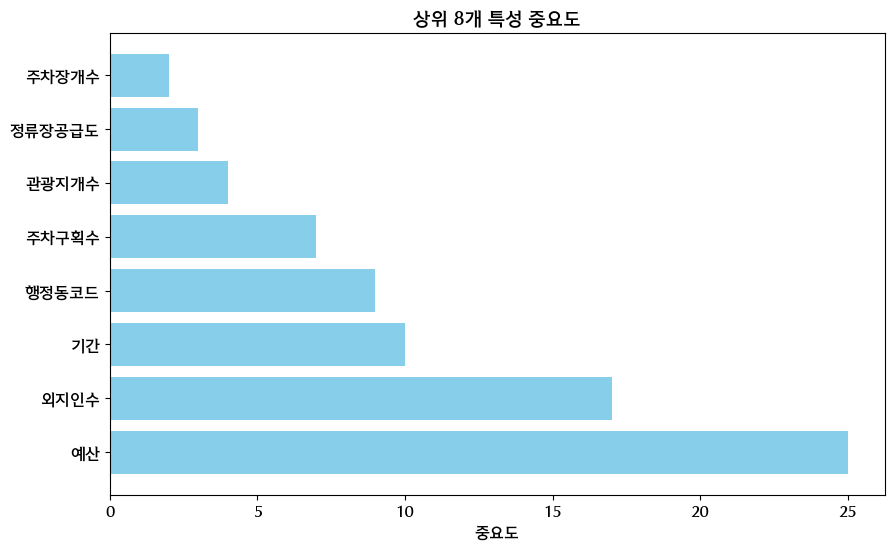

In [ ]:
# 한글 폰트 경로 지정
font_path = '/content/drive/MyDrive/ewha.ttf'
font_prop = fm.FontProperties(fname=font_path)

feature_importances = lgbm_reg.feature_importances_
features = ftr.columns

# 피처 중요도 데이터프레임 생성
importance_df = pd.DataFrame({
    '특성': features,
    '중요도': feature_importances
}).sort_values(by='중요도', ascending=False)

# 상위 20개의 피처만 추출 (피처가 20개 미만이면 모두 표시)
top_20_features = importance_df.head(8)

# 중요 피처 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_20_features['특성'], top_20_features['중요도'], color='skyblue')
plt.xlabel('중요도', fontproperties=font_prop, fontsize=12)
plt.title('상위 8개 특성 중요도', fontproperties=font_prop, fontsize=14)
plt.yticks(fontproperties=font_prop, fontsize=12)
plt.xticks(fontproperties=font_prop, fontsize=12)

# 그래프의 모든 텍스트 요소에 한글 폰트 적용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 깨짐 방지
plt.show()

### XGBoost

- 변수 전처리 코드

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') # 경고 메시지 필터링
plt.rc('font', family='NanumBarunGothic') # 한글 깨짐 방지

# 외지인 수 포함 변수최종 데이터 불러오기
fest_df = pd.read_csv('지역축제_최종합본.csv')

fest = fest_df.copy()
fest = fest.set_index('축제명')

fest.drop(columns = ['시작일','종료일'], inplace=True)

# 레이블 인코딩 진행
le = LabelEncoder()
fest['시도'] = le.fit_transform(fest['시도'])
fest['축제유형'] = le.fit_transform(fest['축제유형'])

In [ ]:
X = fest.drop(columns=['방문객수', '행정동', '시군구', '주차장개수'], axis=1)
y = fest['방문객수']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=100)

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 84925.68834564743


Text(0.5, 1.0, 'XGB Feature Importance')

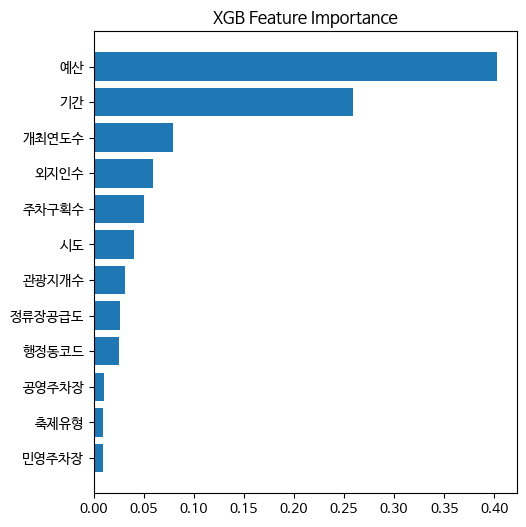

In [ ]:
feature_importance = xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("XGB Feature Importance")

In [ ]:
xgb1 = XGBRegressor(learning_rate=0.01, n_estimators=200)
xgb1.fit(X_train, y_train)

y_pred = xgb1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 80800.84742058713


Text(0.5, 1.0, 'XGB Feature Importance')

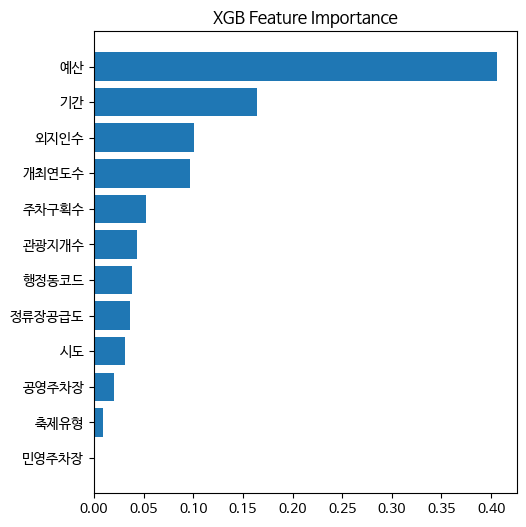

In [ ]:
feature_importance = xgb1.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("XGB Feature Importance")

In [ ]:
# 로그변환
X = fest.drop(columns=['방문객수', '행정동', '시군구', '주차장개수'], axis=1)
y = fest['방문객수']
y = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

xgb2 = XGBRegressor(learning_rate=0.01, n_estimators=200)
xgb2.fit(X_train, y_train)

pred = xgb2.predict(X_test)
y_pred = np.expm1(pred)
y_test = np.expm1(y_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 64246.98076547407


Text(0.5, 1.0, 'XGB Feature Importance')

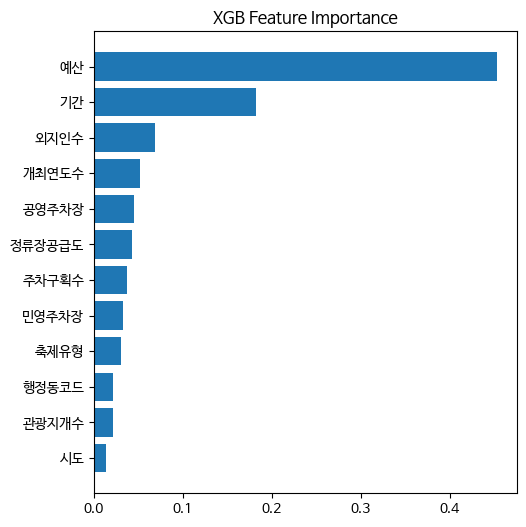

In [ ]:
feature_importance = xgb2.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("XGB Feature Importance")

### RandomForest

**전처리**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

fest = fest_df.drop(columns=['축제명', '시작일', '종료일', '시군구', '행정동', '행정동코드', '민영주차장', '공영주차장'])

# Label Encoding
le = LabelEncoder()
sido_le = le.fit_transform(fest['시도'])
fest['시도'] = sido_le
type_le = le.fit_transform(fest['축제유형'])
fest['축제유형'] = type_le

X = fest.drop(columns=['방문객수'])
y = fest['방문객수']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Log Transform
y_train_log = np.log(y_train)

(171, 10) (43, 10) (171,) (43,)


- '민영주차장', '공영주차장'은 다른 주차장 관련 변수와 상관관계가 매우 높았으므로 drop
- target인 '방문객수'의 right skewed 정도가 심했기 때문에, log transform을 적용

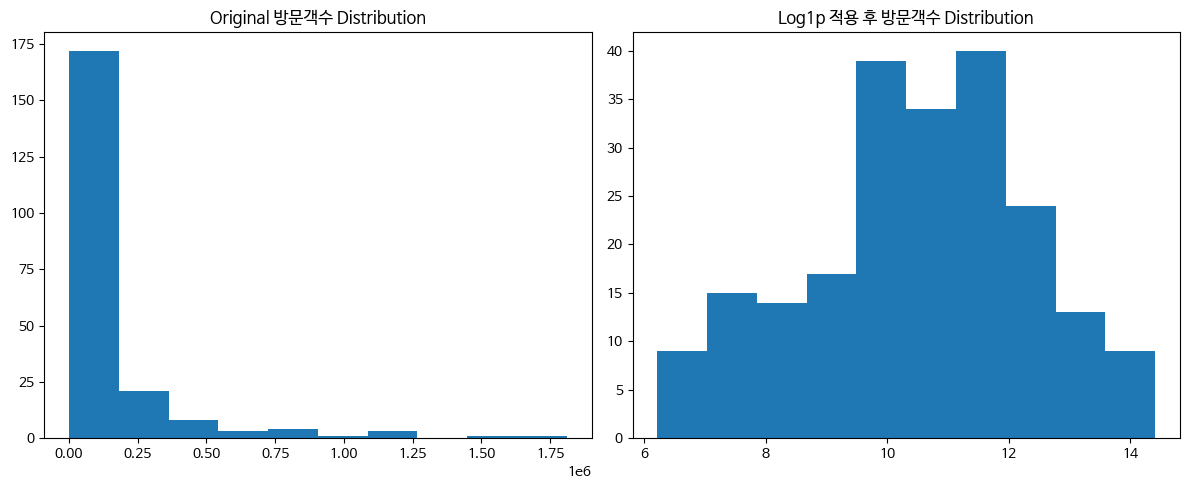

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(fest['방문객수'])
axes[0].set_title('Original 방문객수 Distribution')

axes[1].hist(np.log1p(fest['방문객수']))
axes[1].set_title('Log1p 적용 후 방문객수 Distribution')

plt.tight_layout()

- Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(max_depth=None, n_estimators=10, random_state=50)
rf.fit(X_train, y_train_log)

y_pred_log = rf.predict(X_test)
y_pred = np.exp(y_pred_log)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse:.4f}")

RMSE: 65127.4145


- feature importance

Text(0, 0.5, 'Feature')

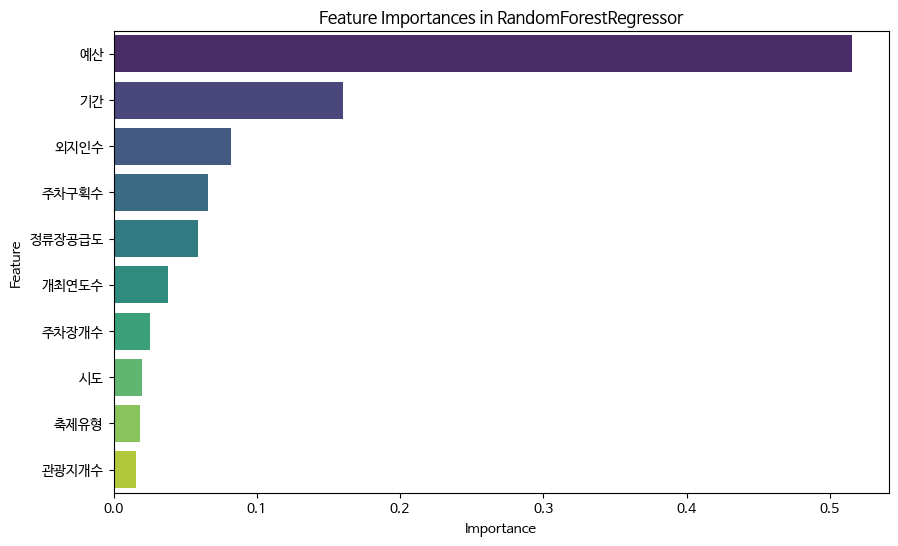

In [ ]:
importances = rf.feature_importances_
features = X_train.columns

indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_features = features[indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_features, palette='viridis')
plt.title('Feature Importances in RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')

### Linear

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

X = fest.drop(columns=['방문객수', '행정동코드', '시작일', '종료일', '민영주차장', '공영주차장'])
X = pd.get_dummies(X, columns=['시도', '시군구', '행정동', '축제유형', '축제명'], drop_first=True).astype(int)
y = fest['방문객수']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

lasso = Lasso(alpha=10, max_iter=5000)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 52384.89571992147


### catboost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

X = fest.drop(columns=['방문객수', '행정동코드', '시작일', '종료일', '민영주차장', '공영주차장'])
y = fest['방문객수']

categorical_features = ['축제유형', '축제명', '시도', '시군구', '행정동']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

catboost_reg = CatBoostRegressor(cat_features=categorical_features, verbose=0, depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.01)

catboost_reg.fit(X_train, y_train)

y_pred = catboost_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(f"Test set RMSE: {rmse}")

Test set RMSE: 93227.21081225768


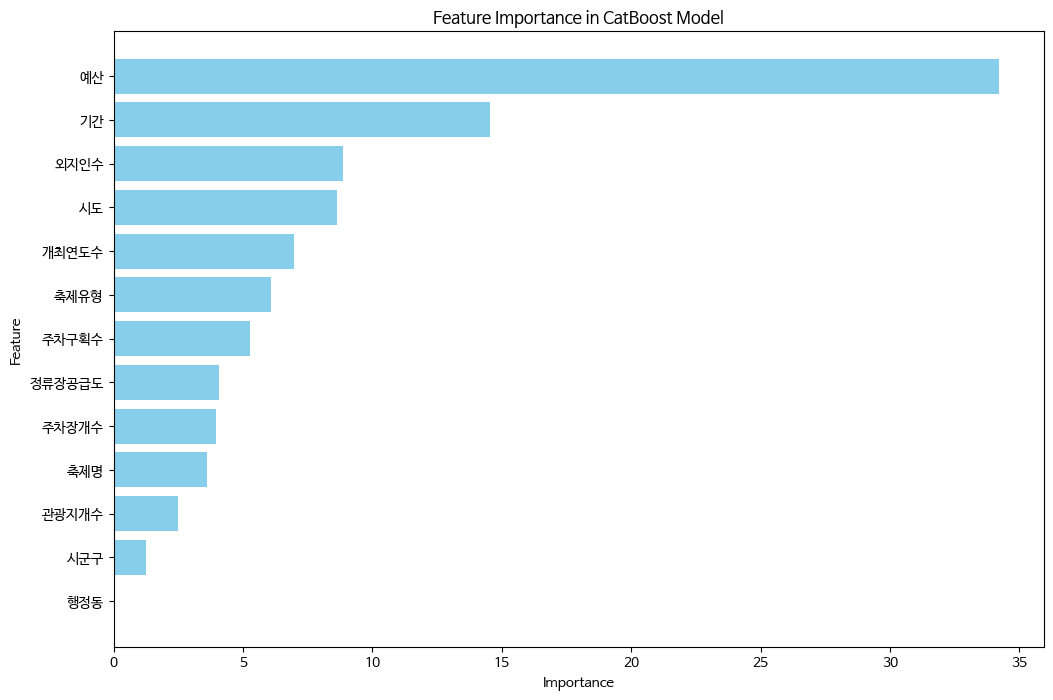

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 피처 중요도 추출
feature_importances = catboost_reg.get_feature_importance()
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance in CatBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# 5. 군집화

## 최종

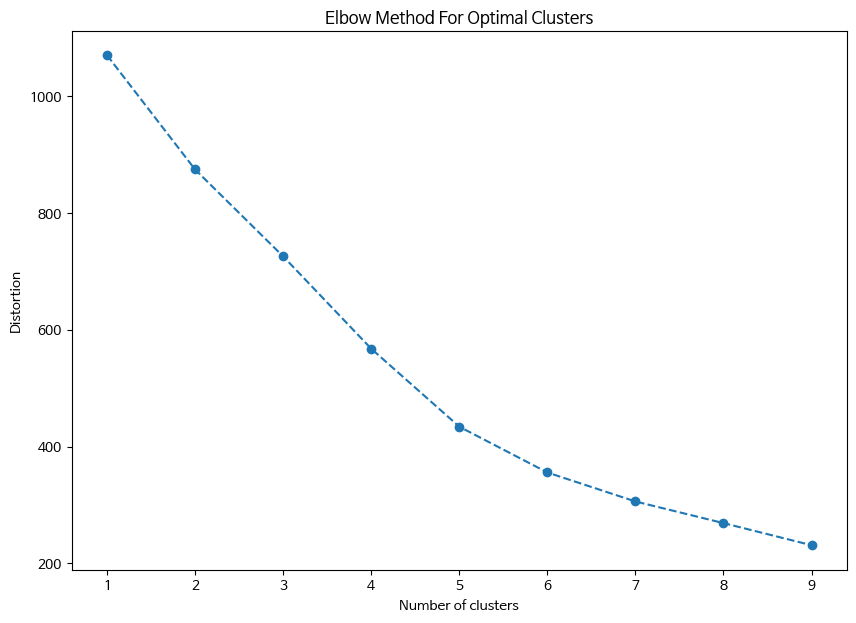

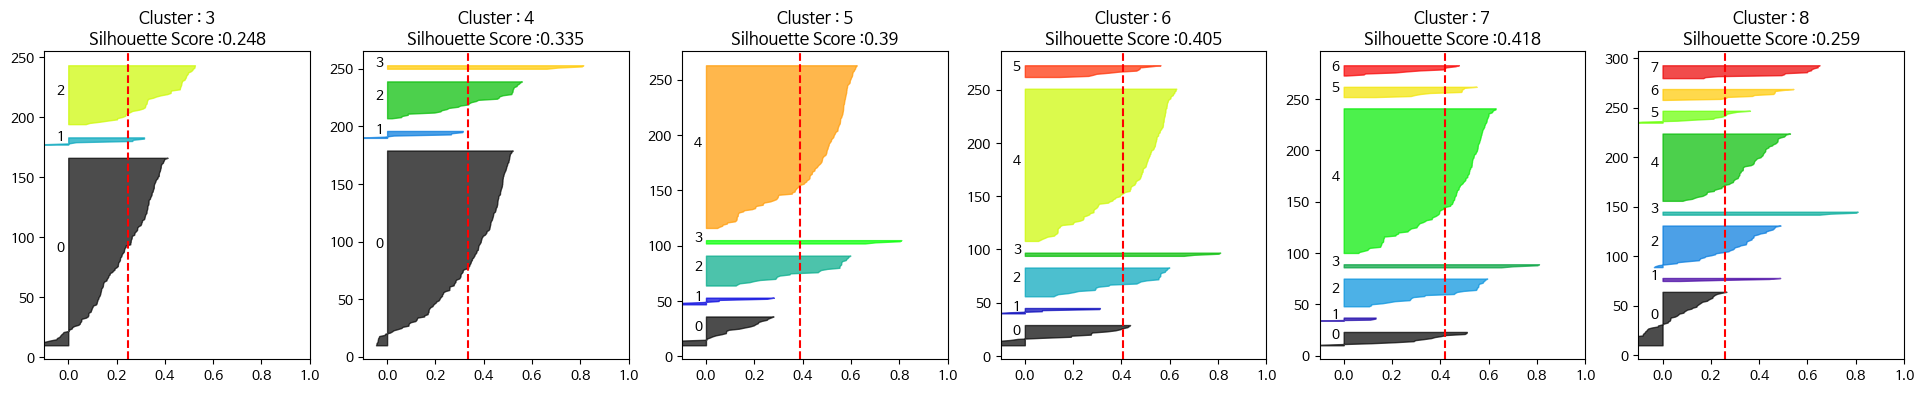

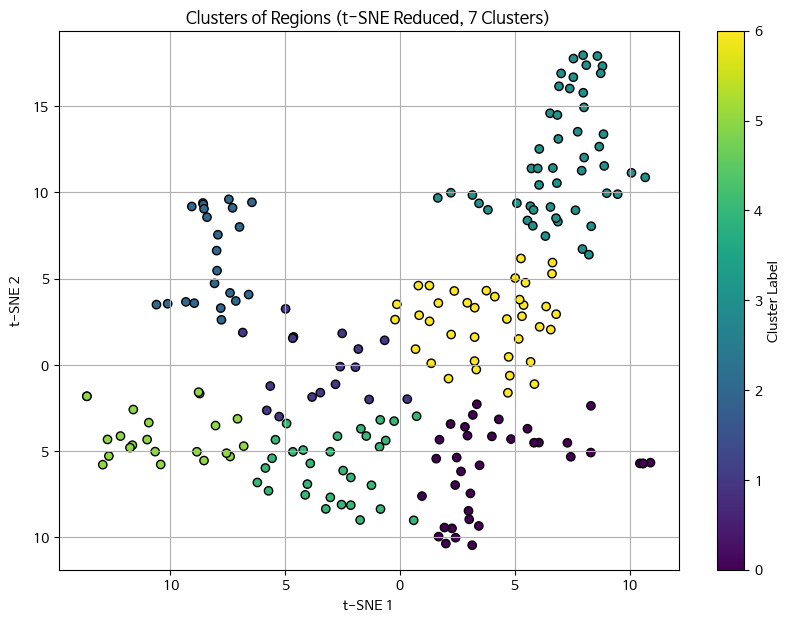

In [ ]:
# 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import pandas as pd

# 스케일링
scaler = StandardScaler()
selected_features = fest[['예산', '외지인수', '기간', '정류장공급도', '주차구획수']]
data_std1 = scaler.fit_transform(selected_features)

# Elbow Method를 통해 최적의 클러스터 수 찾기
def plot_elbow(X_features):
    distortions = []
    for i in range(1, 10):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(X_features)
        distortions.append(kmeans.inertia_)
    plt.figure(figsize=(10, 7))
    plt.plot(range(1, 10), distortions, marker='o', linestyle='--')
    plt.title('Elbow Method For Optimal Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

plot_elbow(data_std1)

# Silhouette 시각화 함수
def visualize_silhouette(cluster_lists, X_features):
    fig, axs = plt.subplots(figsize=(4*len(cluster_lists), 4), nrows=1, ncols=len(cluster_lists))
    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters=n_cluster, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        y_lower = 10
        axs[ind].set_title('Cluster : ' + str(n_cluster) + '\n' +
                           'Silhouette Score :' + str(round(sil_avg, 3)))
        axs[ind].set_xlim([-0.1, 1])
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = plt.cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                   facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
    plt.show()

# Silhouette 시각화
visualize_silhouette([3, 4, 5, 6, 7, 8], data_std1)

# t-SNE로 차원 축소
tsne = TSNE(n_components=2, random_state=42)
tsne_transformed = tsne.fit_transform(data_std1)

# KMeans 클러스터링 적용 (n_clusters=7)
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_labels = kmeans.fit_predict(tsne_transformed)

# 클러스터 레이블 추가된 데이터프레임 생성
df_with_labels = pd.DataFrame(selected_features, columns=selected_features.columns)
df_with_labels['Cluster'] = kmeans_labels

# 클러스터별 평균값 계산
feature_means_by_cluster = df_with_labels.groupby('Cluster').mean()

# t-SNE 차원으로 클러스터 시각화
plt.figure(figsize=(10, 7))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k')
plt.title('Clusters of Regions (t-SNE Reduced, 7 Clusters)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()

# 6. 군집 분석

In [ ]:
fest_cluster = fest_df.copy()
fest_cluster['군집'] = kmeans_labels
fest_cluster['군집'].value_counts()

,count
군집,
3,49
6,38
0,36
4,30
2,22
5,22
1,17


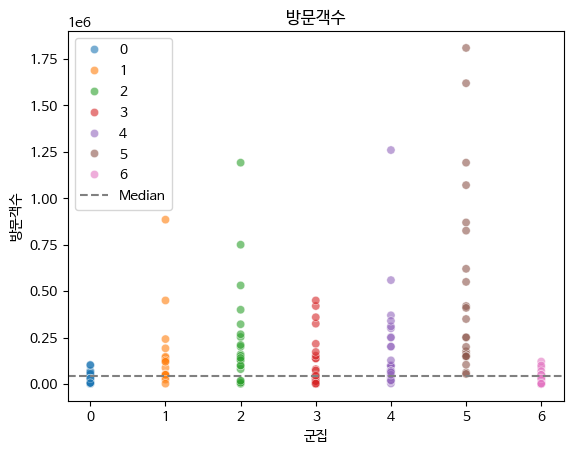

In [ ]:
sns.scatterplot(data=fest_cluster, x='군집', y='방문객수', hue='군집', alpha=0.6, palette=sns.color_palette("tab10"))
plt.xticks(ticks=[0,1,2,3,4,5,6])
plt.axhline(fest_cluster['방문객수'].median(), color='gray', linestyle='--', label='Median')
plt.title('방문객수')
plt.legend()

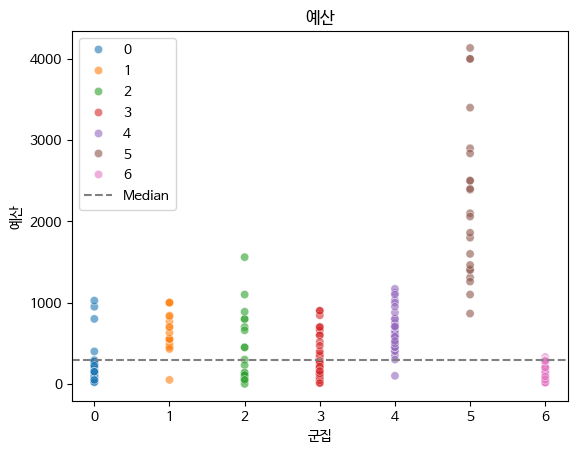

In [ ]:
sns.scatterplot(data=fest_cluster, x='군집', y='예산', hue='군집', alpha=0.6, palette=sns.color_palette("tab10"))
plt.xticks(ticks=[0,1,2,3,4,5,6])
plt.axhline(fest_cluster['예산'].median(), color='gray', linestyle='--', label='Median')
plt.title('예산')
plt.legend()

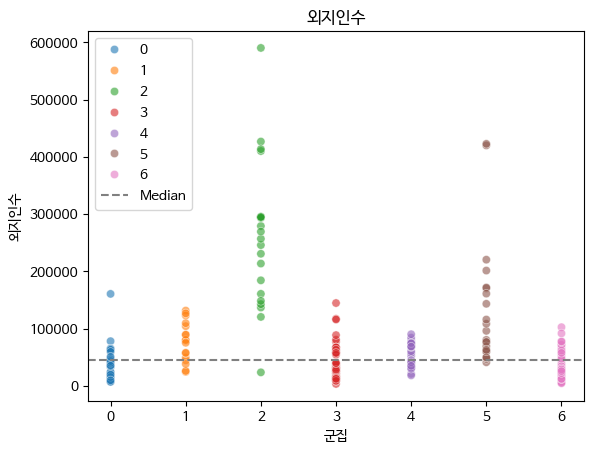

In [ ]:
sns.scatterplot(data=fest_cluster, x='군집', y='외지인수', hue='군집', alpha=0.6, palette=sns.color_palette("tab10"))
plt.xticks(ticks=[0,1,2,3,4,5,6])
plt.axhline(fest_cluster['외지인수'].median(), color='gray', linestyle='--', label='Median')
plt.title('외지인수')
plt.legend()

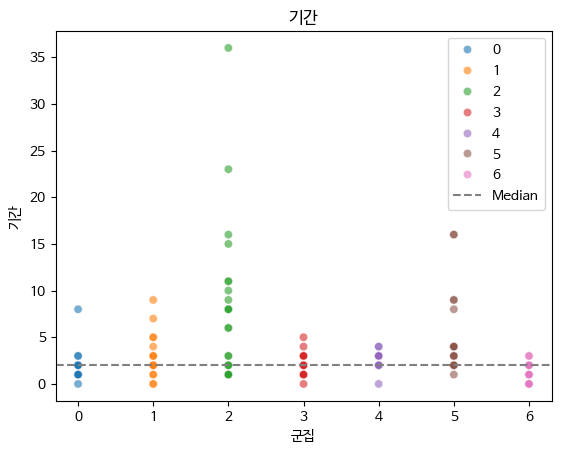

In [ ]:
sns.scatterplot(data=fest_cluster, x='군집', y='기간', hue='군집', alpha=0.6, palette=sns.color_palette("tab10"))
plt.xticks(ticks=[0,1,2,3,4,5,6])
plt.axhline(fest_cluster['기간'].median(), color='gray', linestyle='--', label='Median')
plt.title('기간')
plt.legend()

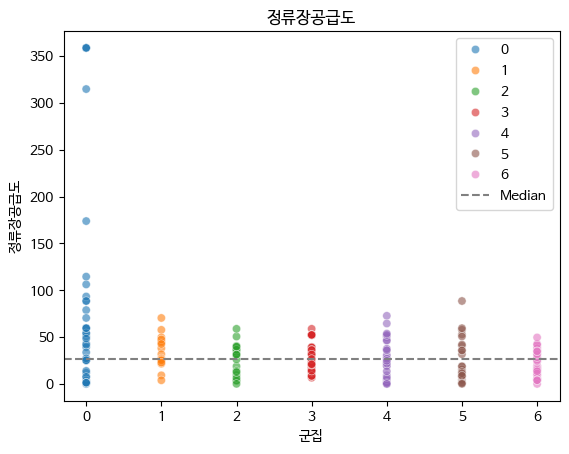

In [ ]:
sns.scatterplot(data=fest_cluster, x='군집', y='정류장공급도', hue='군집', alpha=0.6, palette=sns.color_palette("tab10"))
plt.xticks(ticks=[0,1,2,3,4,5,6])
plt.axhline(fest_cluster['정류장공급도'].median(), color='gray', linestyle='--', label='Median')
plt.title('정류장공급도')
plt.legend()

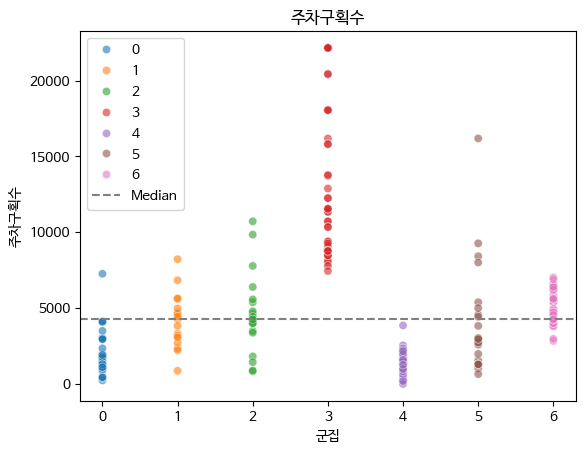

In [ ]:
sns.scatterplot(data=fest_cluster, x='군집', y='주차구획수', hue='군집', alpha=0.6, palette=sns.color_palette("tab10"))
plt.xticks(ticks=[0,1,2,3,4,5,6])
plt.axhline(fest_cluster['주차구획수'].median(), color='gray', linestyle='--', label='Median')
plt.title('주차구획수')
plt.legend()

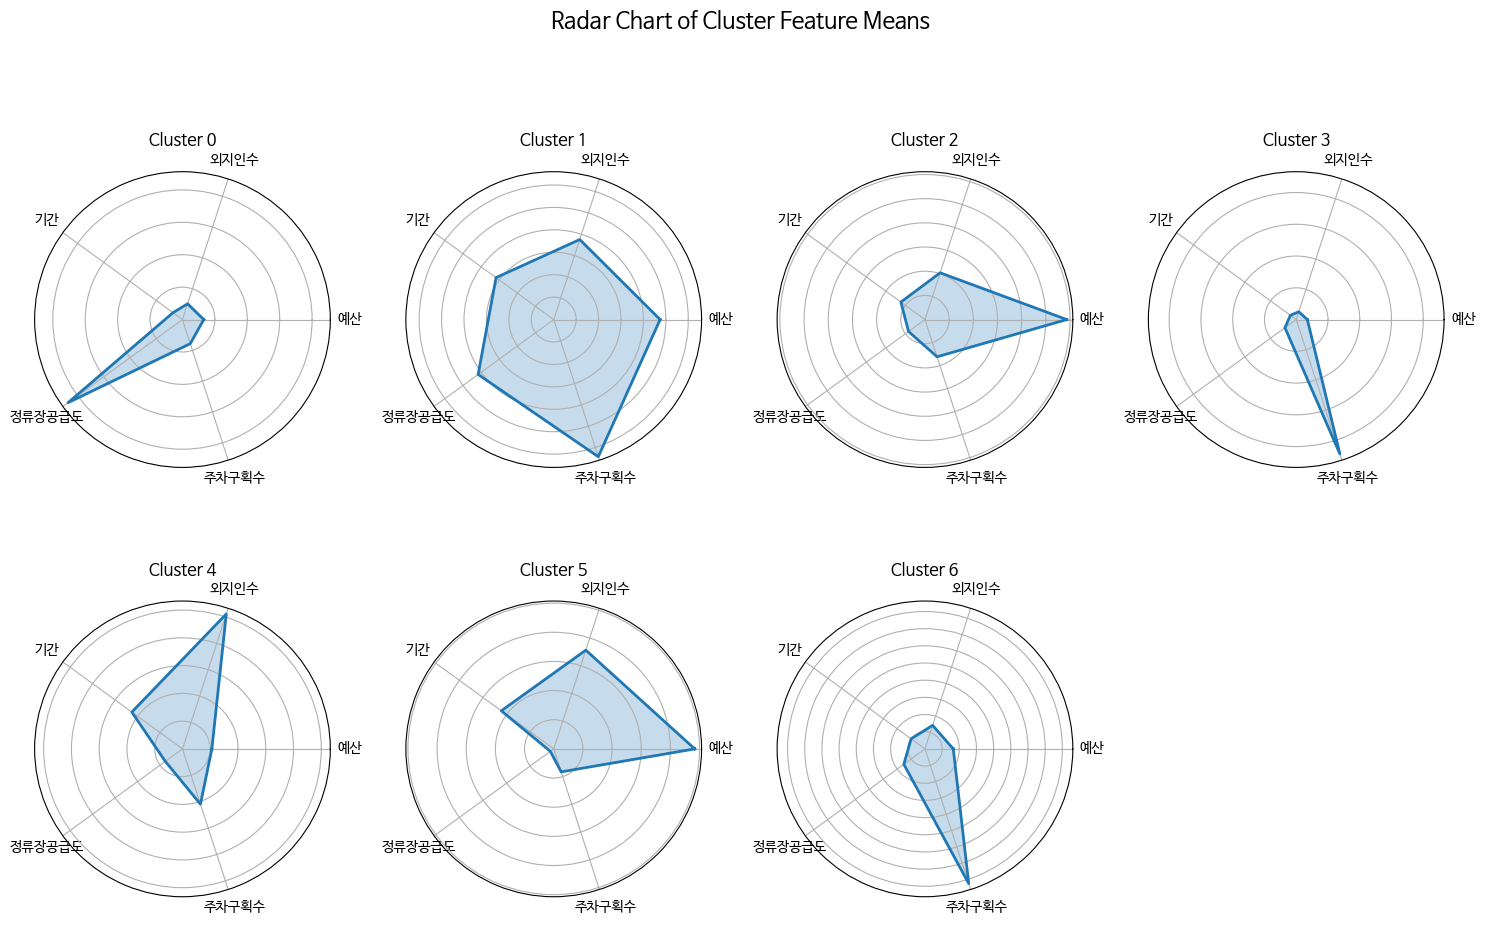

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# 변수 스케일링
scaler = StandardScaler()
data_std1 = scaler.fit_transform(selected_features)

feature_means_by_cluster = df_with_labels.groupby('Cluster').mean()
# 클러스터별 평균값을 레이다 차트로 표현
labels = feature_means_by_cluster.columns
num_vars = len(labels)
num_clusters = len(feature_means_by_cluster)

# 서브플롯 생성 (2행 n열로 클러스터 수에 따라 조정)
fig, axs = plt.subplots(2, (num_clusters + 1) // 2, figsize=(15, 10), subplot_kw=dict(polar=True))
axs = axs.flatten()  # 2D 배열을 1D 배열로 변환하여 접근하기 쉽게

# 각 클러스터에 대해 레이더 차트 그리기
for i in range(num_clusters):
    values = feature_means_by_cluster.iloc[i].values.flatten().tolist()
    values += values[:1]  # 처음 값을 다시 끝에 추가하여 폐곡선 만듦
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # 각 클러스터의 레이더 차트를 서브플롯에 그리기
    axs[i].fill(angles, values, alpha=0.25, label=f'Cluster {i}')
    axs[i].plot(angles, values, linewidth=2)
    axs[i].set_yticklabels([])
    axs[i].set_xticks(angles[:-1])
    axs[i].set_xticklabels(labels)
    axs[i].set_title(f'Cluster {i}')

# 남은 빈 서브플롯을 숨김
if num_clusters % 2 != 0:
    axs[-1].axis('off')

# 전체 타이틀 설정
plt.suptitle('Radar Chart of Cluster Feature Means', size=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
